<a href="https://colab.research.google.com/github/gautam-pai/PyTorch-Learning/blob/main/Single_Image_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.nn import functional as F

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from torchvision.io import read_image

## Read image

In [39]:
image_path='basketball.jpg'


In [40]:
image_tensor = read_image(image_path)

In [41]:
image_tensor

tensor([[[182, 182, 182,  ..., 132, 132, 132],
         [182, 182, 183,  ..., 130, 130, 130],
         [183, 183, 183,  ..., 125, 125, 125],
         ...,
         [201, 201, 201,  ..., 187, 187, 187],
         [198, 198, 199,  ..., 189, 189, 189],
         [196, 196, 196,  ..., 191, 191, 191]],

        [[149, 149, 149,  ..., 113, 113, 113],
         [149, 149, 150,  ..., 112, 112, 112],
         [150, 150, 150,  ..., 108, 108, 108],
         ...,
         [168, 168, 168,  ..., 151, 151, 151],
         [165, 165, 166,  ..., 153, 153, 153],
         [164, 164, 164,  ..., 155, 155, 155]],

        [[116, 116, 116,  ...,  96,  96,  96],
         [116, 116, 117,  ...,  98,  98,  98],
         [117, 117, 117,  ..., 100, 100, 100],
         ...,
         [123, 123, 123,  ..., 115, 115, 115],
         [120, 120, 121,  ..., 117, 117, 117],
         [117, 117, 117,  ..., 119, 119, 119]]], dtype=torch.uint8)

## Image in RGB format

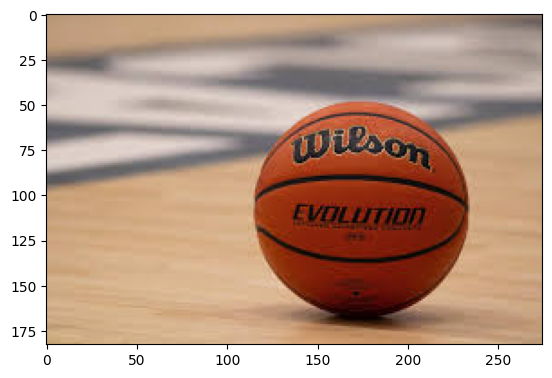

In [42]:
plt.imshow(image_tensor.permute(1,2,0))

In [43]:
image_tensor.shape

torch.Size([3, 183, 275])

In [44]:
mask=torch.zeros(image_tensor.shape[1],image_tensor.shape[2])

## Image in Red Format ( Green Blue Masked )

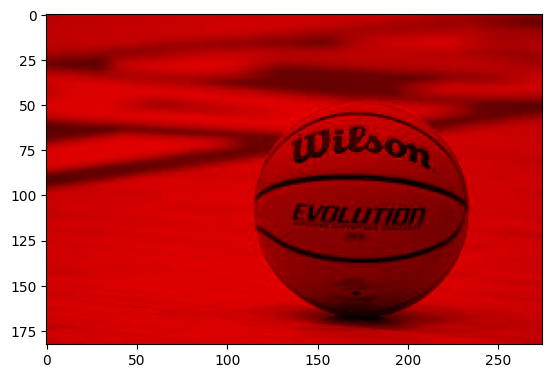

In [45]:
gb_masked=image_tensor.clone()
gb_masked[1]=gb_masked[1]*mask
gb_masked[2]=gb_masked[2]*mask
plt.imshow(gb_masked.permute(1,2,0))

## Image in Green Format ( Red Blue Masked )

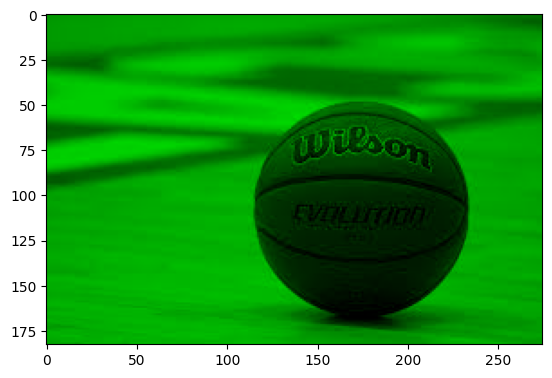

In [46]:
rb_masked=image_tensor.clone()
rb_masked[0]=rb_masked[0]*mask
rb_masked[2]=rb_masked[2]*mask
plt.imshow(rb_masked.permute(1,2,0))

## Image in Blue Format ( Red Green Masked )

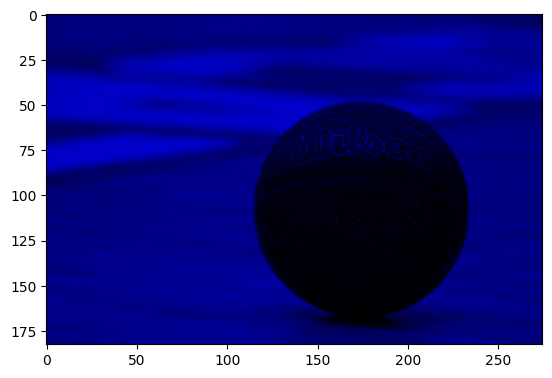

In [47]:
rg_masked=image_tensor.clone()
rg_masked[0]=rg_masked[0]*mask
rg_masked[1]=rg_masked[1]*mask
plt.imshow(rg_masked.permute(1,2,0))

In [48]:
gb_masked=gb_masked.unsqueeze(0)

In [49]:
gb_masked.shape

torch.Size([1, 3, 183, 275])

## Single Convolution Function

In [53]:
class convolve(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=3,kernel_size=3,stride=1,padding=1)
  def forward(self,X):
    X[0]=self.conv1(X[0])
    return X

In [54]:
One_Layer_Model=convolve()

In [55]:
red_edge=One_Layer_Model(gb_masked.float()).squeeze(0)

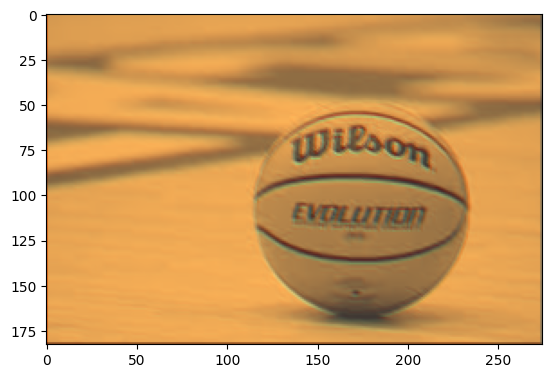

In [56]:
red_edge = red_edge.detach().cpu()
red_edge_normalized = (red_edge - red_edge.min()) / (red_edge.max() - red_edge.min())
plt.imshow(red_edge_normalized.permute(1,2,0))

In [57]:
rg_masked=rg_masked.unsqueeze(0)

In [58]:
rg_masked.shape

torch.Size([1, 3, 183, 275])

In [59]:
blue_edge=One_Layer_Model(rg_masked.float()).squeeze(0)

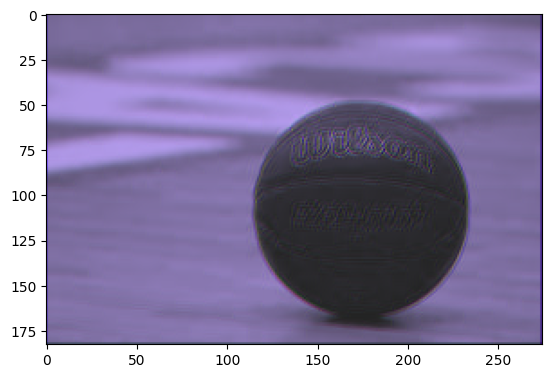

In [60]:
blue_edge = blue_edge.detach().cpu()
blue_edge_normalized = (blue_edge - blue_edge.min()) / (blue_edge.max() - blue_edge.min())
plt.imshow(blue_edge_normalized.permute(1,2,0))

In [61]:
rb_masked=rb_masked.unsqueeze(0)
rb_masked.shape

torch.Size([1, 3, 183, 275])

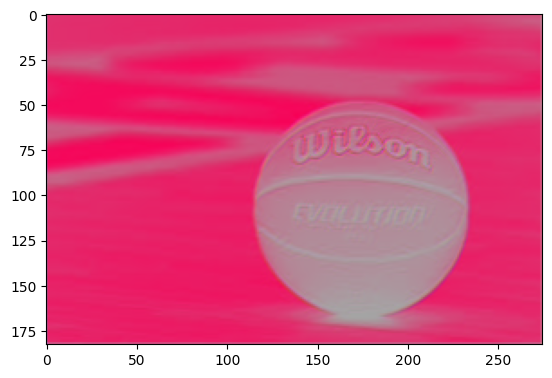

In [62]:
green_edge=One_Layer_Model(rb_masked.float()).squeeze(0)
green_edge = green_edge.detach().cpu()
green_edge_normalized = (green_edge - green_edge.min()) / (green_edge.max() - green_edge.min())
plt.imshow(green_edge_normalized.permute(1,2,0))

In [63]:
final_edges=torch.empty(size=image_tensor.shape)
final_edges.shape

torch.Size([3, 183, 275])

In [64]:
final_edges[0],final_edges[1],final_edges[2]=red_edge_normalized[0],green_edge_normalized[1],blue_edge_normalized[2]

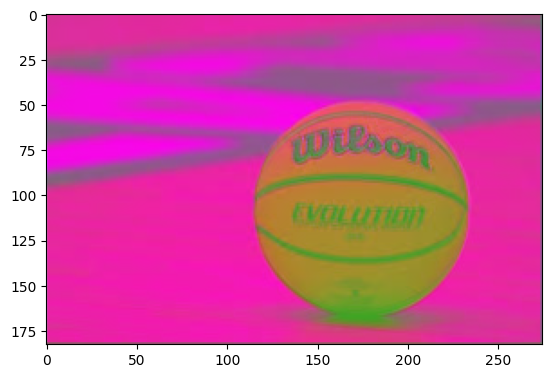

In [65]:
plt.imshow(final_edges.permute(1,2,0))

In [66]:
class convolve(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1=nn.Conv2d(in_channels=3,out_channels=3,kernel_size=3,stride=1,padding=1)
    self.conv2=nn.Conv2d(in_channels=3,out_channels=3,kernel_size=3,stride=1,padding=1)
  def forward(self,X):
    X[0]=self.conv1(X[0])
    X[0]=self.conv2(X[0])
    return X

In [67]:
Two_Layer_Model=convolve()

In [68]:
gb_masked.shape

torch.Size([1, 3, 183, 275])

In [69]:

red_edge=Two_Layer_Model(gb_masked.float()).squeeze(0)
red_edge = red_edge.detach().cpu()
red_edge_normalized = (red_edge - red_edge.min()) / (red_edge.max() - red_edge.min())


blue_edge=Two_Layer_Model(rg_masked.float()).squeeze(0)
blue_edge = blue_edge.detach().cpu()
blue_edge_normalized = (blue_edge - blue_edge.min()) / (blue_edge.max() - blue_edge.min())


green_edge=Two_Layer_Model(rb_masked.float()).squeeze(0)
green_edge = green_edge.detach().cpu()
green_edge_normalized = (green_edge - green_edge.min()) / (green_edge.max() - green_edge.min())




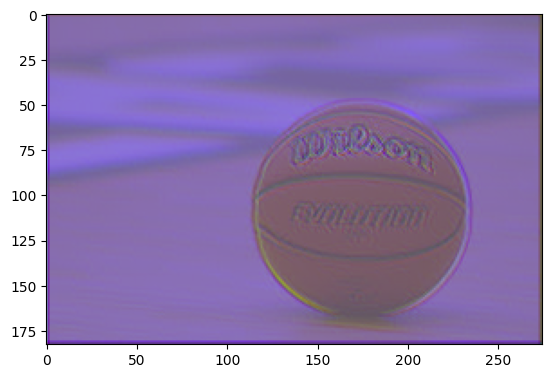

In [70]:
final_edges=torch.empty(size=image_tensor.shape)
final_edges[0],final_edges[1],final_edges[2]=red_edge_normalized[0],green_edge_normalized[1],blue_edge_normalized[2]
plt.imshow(final_edges.permute(1,2,0))

In [75]:
final_edges[2].shape

torch.Size([183, 275])

In [37]:
red_edge_normalized[0]

tensor([[0.4986, 0.7283, 0.7109,  ..., 0.6735, 0.6778, 0.7351],
        [0.4709, 0.8516, 0.8669,  ..., 0.7796, 0.8102, 0.9186],
        [0.4414, 0.7027, 0.6755,  ..., 0.6283, 0.6332, 0.8003],
        ...,
        [0.4269, 0.7048, 0.6774,  ..., 0.6694, 0.6723, 0.9168],
        [0.4763, 0.7094, 0.7171,  ..., 0.7103, 0.6418, 0.8796],
        [0.4751, 0.5447, 0.5795,  ..., 0.5809, 0.5852, 0.7907]])

In [38]:
red_edge_normalized[1]

tensor([[0.4365, 0.4690, 0.5079,  ..., 0.5388, 0.4673, 0.4319],
        [0.3510, 0.4196, 0.4922,  ..., 0.5405, 0.4816, 0.5741],
        [0.4785, 0.4224, 0.4796,  ..., 0.5430, 0.3933, 0.4779],
        ...,
        [0.4832, 0.4219, 0.4830,  ..., 0.4768, 0.2468, 0.3819],
        [0.5495, 0.5490, 0.5513,  ..., 0.5386, 0.3490, 0.4592],
        [0.6005, 0.5122, 0.5370,  ..., 0.5377, 0.3904, 0.6101]])